In [1]:
%load_ext autoreload
%autoreload 2
# import gen_data

import numpy as np
import pandas as pd
import gen_data
import regex as re
import seaborn as sns

In [16]:
industries = pd.read_csv('IndustryByState_2005-2021.csv').drop(columns=['GeoFips','LineCode'])
industries.loc[:,'Description'] = industries.loc[:,'Description'].apply(lambda x: x.strip())
industries = industries.set_index(['GeoName', 'Description']).mean(axis=1).reset_index('Description')
industries = industries.pivot(columns='Description',values=0)
industries.columns = industries.columns.to_list()
industries.index.rename('State', inplace=True)
industries = industries[['Information']].rename(columns = {'Information':'GDPcont_t0'})

spat = {"New England" : ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
 "Mideast" : ['Delaware','District of Columbia','Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
 "Great Lakes" : ['Illinois','Indiana','Michigan','Ohio','Wisconsin'],
 "Plains" : ['Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota', 'South Dakota'],
 "Southeast" : ['Alabama', 'Alabama', 'Arkansas', 'Florida','Georgia', 'Kentucky','Louisiana','Mississippi','North Carolina','South Carolina','Tennessee','Virginia','West Virginia'],
 "Southwest" : ['Arizona','New Mexico','Oklahoma','Texas'],
 "Rocky Mountain" : ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
 "Far West" : ['Alaska', 'California','Hawaii','Nevada','Oregon','Washington']}
spat_inv = {}
for region, states in spat.items():
    sub_dict = {state : region for state in states}
    spat_inv.update(sub_dict)
spat_inv

regions = industries.reset_index('State')['State'].apply(lambda x: spat_inv[x])
regions.index = industries.index
industries.loc[:,'Region'] = regions
industries.to_csv('IndustriesTechClean.csv')
industries.sort_values('GDPcont_t0', ascending=False)

,GDPcont_t0,Region
State,,
Washington,0.947419,Far West
California,0.709355,Far West
New York,0.465806,Mideast
Pennsylvania,0.418226,Mideast
Georgia,0.370968,Southeast
Connecticut,0.313871,New England
Utah,0.310000,Rocky Mountain
Colorado,0.268387,Rocky Mountain
Massachusetts,0.259516,New England


In [17]:
states = industries.reset_index().reset_index().rename(columns={'index':'state_int'})
regions = pd.DataFrame(pd.unique(industries.Region)).reset_index().rename(columns={'index':'region_int',0:'Region'})
loc_map = states.merge(regions, on = 'Region')
loc_map

,state_int,State,GDPcont_t0,Region,region_int
0,0,Alabama,0.039194,Southeast,0
1,3,Arkansas,0.047581,Southeast,0
2,9,Florida,0.192097,Southeast,0
3,10,Georgia,0.370968,Southeast,0
4,17,Kentucky,0.115323,Southeast,0
5,18,Louisiana,0.071774,Southeast,0
6,24,Mississippi,0.090161,Southeast,0
7,33,North Carolina,0.201129,Southeast,0
8,40,South Carolina,0.163548,Southeast,0
9,42,Tennessee,0.145323,Southeast,0


In [180]:
state_mat = loc_map[['state_int', 'region_int', 'GDPcont_t0']].to_csv('location_sim_base.csv')
# state_mat

In [24]:
# treat = gen_data.init_sim(state_mat, 10, 5, (5,0), (2, 0))
import init_sim
# treat = init_sim.init_sim(state_mat, N_STATES = 10, N_TREATED = 5,
#                                     TREATMENT_YEAR_MU = 5,TREATMENT_YEAR_SIGMA = 0,
#                                     TREATMENT_EFFECT_MU = 2, TREATMENT_EFFECT_SIGMA = 0)
treat = init_sim.init_sim(state_mat, 10, 5, 5, 0, 2, 0)
pd.DataFrame(treat)

,0,1,2,3,4,5
0,0.0,0.0,0.039194,1.0,5.0,2.0
1,8.0,0.0,0.163548,NaN,NaN,2.0
2,7.0,0.0,0.201129,1.0,5.0,2.0
3,16.0,1.0,0.200968,1.0,5.0,2.0
4,3.0,0.0,0.370968,1.0,5.0,2.0
5,42.0,6.0,0.110484,NaN,NaN,2.0
6,21.0,2.0,0.210161,NaN,NaN,2.0
7,41.0,6.0,0.098226,1.0,5.0,2.0
8,38.0,5.0,0.418226,NaN,NaN,2.0
9,19.0,2.0,0.121129,NaN,NaN,2.0


In [26]:
import run_sim
simLong = run_sim.run_sim(treat, 10, .3, .001, .2, .001, 0.0, 1220)

In [27]:
simLong_df = pd.DataFrame(simLong, columns=['state_int','t', 'stateControls_t', 'GDPcont_t'])
simLong_df = simLong_df.merge(loc_map, on = 'state_int')

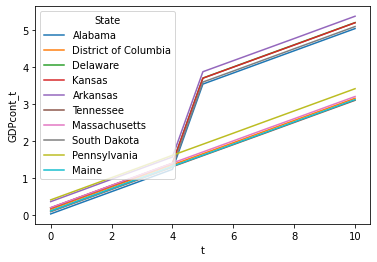

In [28]:
ax = sns.lineplot(data= simLong_df, x = 't', y = 'GDPcont_t', hue = 'State')
# ax.get_legend().remove()

In [66]:
import fit_model
init_mat = treat
sim_mat = simLong
# lm, data, baseline = fit_model.fit_TWFE(data=simLong,
#                                         treatment_years=treatment,
#                                         target = 'GDPcont_t',
#                                         linear_time=False,
# #                                         treat_dummy_type='time_variant')
data_out, labels, baseline, target = fit_model.preprocess_data(sim_mat, init_mat, 
                                    linear_time=True,
                                    treat_dummy_type=0)
# ss = fit_model.fit_TWFE(sim_mat, init_mat, 
#                                     linear_time=True,
#                                     treat_dummy_type='invariant')

/media/nick/Data/GitRepos/TreatmentBiasInvestigator/fit_model.py:79: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, A))
  # return data_out
/media/nick/Data/GitRepos/TreatmentBiasInvestigator/fit_model.py:79: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  # return data_out
/media/nick/Data/GitRepos/TreatmentBiasInvestigator/fit_model.py:79: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  # return data_out
/home/nick/miniconda3/envs/CAPP/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/nick/miniconda3/envs/CAPP/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@

In [68]:
target.flags['C_CONTIGUOUS']

True

In [40]:
tst= pd.DataFrame(data_out, columns=labels).applymap(float)
tst

,const,state_controls,t,state_8,state_7,state_16,state_3,state_42,state_21,state_41,state_38,state_19,d
0,1.0,0.459724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.270723,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.246542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.360455,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.198179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.0,0.265882,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106,1.0,0.320423,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
107,1.0,0.266525,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
108,1.0,0.324158,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
import statsmodels.api as sm
lm_FixedEffect = sm.OLS(target, tst)
results = lm_FixedEffect.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.841e+06
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          3.91e-287
Time:                        23:46:37   Log-Likelihood:                 558.08
No. Observations:                 110   AIC:                            -1090.
Df Residuals:                      97   BIC:                            -1055.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0436      0.001     45.106      0.000       0.042       0.046
state_controls    -0.0044      0.003     -1.679      0.096      -0.010       0.001
t                  0.2997   6.15e-05   4869.546      0.000       0.300       0.300
state_8            0.3327      0.001    483.533      0.000       0.331       0.334
state_7            0.1624      0.001    235.759      0.000       0.161       0.164
state_16           0.1218      0.001    161.971      0.000       0.120       0.123
state_3            0.1587      0.001    230.647      0.000       0.157       0.160
state_42           0.0814      0.001    108.000      0.000       0.080       0.083
state_21           0.1694      0.001    224.010      0.000       0.168       0.171
state_41           0.3780      0.001    500.926      0.000       0.377       0.379
state_38           0.0559      0.001     81.236      0.000       0.055       0.057
state_19           0.0688      0.001     91.562      0.000       0.067       0.070
d                  2.0003      0.001   3616.671      0.000       1.999       2.001
==============================================================================
Omnibus:                        3.139   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.712
Skew:                          -0.380   Prob(JB):                        0.258
Kurtosis:                       3.124   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
target[:,0].copy()

array([0.03919355, 0.16354839, 0.20112903, 0.20096774, 0.37096774,
       0.11048387, 0.21016129, 0.09822581, 0.41822581, 0.12112903,
       0.34072254, 0.46537034, 0.50313124, 0.50120921, 0.67197015,
       0.41064581, 0.50979743, 0.39777843, 0.71750449, 0.42173998,
       0.64007181, 0.76518626, 0.80391373, 0.80326114, 0.97501909,
       0.71184573, 0.81159736, 0.69872939, 1.01834696, 0.72418326,
       0.93997486, 1.0642082 , 1.10459134, 1.10185161, 1.27526361,
       1.01194649, 1.11226665, 0.99858858, 1.31862842, 1.02392029,
       1.24187721, 1.36464277, 1.40565912, 1.40182067, 1.57588087,
       1.31359077, 1.41133921, 1.29861523, 1.62117668, 1.32509912,
       3.5427628 , 1.66306835, 3.70479815, 3.7010641 , 3.87581033,
       1.61134278, 1.71081608, 3.59737343, 1.91961721, 1.62252088,
       3.84153689, 1.96002974, 4.0041794 , 3.99922359, 4.17452733,
       1.90879587, 2.01018407, 3.89471928, 2.21833748, 1.9206768 ,
       4.14176587, 2.26088911, 4.3044251 , 4.29801125, 4.47271

In [72]:
import compute_OLS
w = compute_OLS.compute_OLS(data_out, target, 0)
# pd.DataFrame(w, columns=labels)


/media/nick/Data/GitRepos/TreatmentBiasInvestigator/fit_model.py:79: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, A))
  # return data_out
/media/nick/Data/GitRepos/TreatmentBiasInvestigator/fit_model.py:79: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  # return data_out
/media/nick/Data/GitRepos/TreatmentBiasInvestigator/fit_model.py:79: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  # return data_out
/media/nick/Data/GitRepos/TreatmentBiasInvestigator/fit_model.py:80: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  # cc.compile()
/home/nick/miniconda3/envs/CAPP/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(flo

array([ 0.04363488, -0.00438123,  0.29968708,  0.33266156,  0.16240814,
        0.12175347,  0.15871685,  0.08135288,  0.16937419,  0.37799809,
        0.05590984,  0.06876959,  2.00026815])

In [90]:
def compute_OLS(X, Y, treat_idx = 0):
    n, k = X.shape
    XTX = X.T @ X
    est = np.empty((2, k))
    est[0, :] = np.linalg.inv(XTX) @ X.T @ Y
    y_hat = X @ est[0, :]
    resid = y_hat - Y
    vcv = np.true_divide(1,(n-k)) *\
        np.dot((resid.T @ resid), np.linalg.inv(XTX))
    # VCV = np.true_divide(1,n-k) * (resid.T @ resid) @ np.linalg.inv(XTX)
    est[1, :] = np.sqrt(np.diagonal(vcv))
    if treat_idx == 0:
        return est
    else:
        return est[:,-treat_idx:]
tst = compute_OLS(data_out, target, treat_idx=1)
pd.DataFrame(tst)

,0
0,2.000268
1,0.000553


In [166]:
loc_map.groupby('Region').mean().sort_values('GDPcont_t0').region_int.to_frame().reset_index()

,Region,region_int
0,Plains,7.0
1,Great Lakes,6.0
2,Southeast,0.0
3,Southwest,2.0
4,New England,4.0
5,Rocky Mountain,3.0
6,Mideast,5.0
7,Far West,1.0


In [178]:
np.arange(0.01,.055, .005).size

9

In [179]:
import init_db
init_db.init_db('results.sql')